In [ ]:
# Churn Prediction in US Telecommunication Industry

In [ ]:
# https://www.kaggle.com/code/agrawalsagar178/churn-in-telecommunication-industry/notebook

In [132]:
import pandas as pd
data = pd.read_csv('churn.csv')
data.shape

(3333, 21)

In [133]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [135]:
# Drop phone number as it is meaningless in our analysis
data = data.drop('phone number', axis=1)

In [137]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate through columns and apply LabelEncoder to non-numeric columns
for column in data.columns:
    if data[column].dtype == 'object' or 'bool':
        data[column] = label_encoder.fit_transform(data[column])

In [138]:
# Display the shape of the modified dataset
print("Modified Dataset Shape:", data.shape)

Modified Dataset Shape: (3333, 20)


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   state                   3333 non-null   int32
 1   account length          3333 non-null   int64
 2   area code               3333 non-null   int64
 3   international plan      3333 non-null   int32
 4   voice mail plan         3333 non-null   int32
 5   number vmail messages   3333 non-null   int64
 6   total day minutes       3333 non-null   int64
 7   total day calls         3333 non-null   int64
 8   total day charge        3333 non-null   int64
 9   total eve minutes       3333 non-null   int64
 10  total eve calls         3333 non-null   int64
 11  total eve charge        3333 non-null   int64
 12  total night minutes     3333 non-null   int64
 13  total night calls       3333 non-null   int64
 14  total night charge      3333 non-null   int64
 15  total intl minutes   

In [140]:
data.describe()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,99.005101,1.000600,0.096910,0.276628,6.440144,826.339634,60.467447,826.339634,801.292529,61.132613,715.447645,793.796580,58.109511,463.044404,81.478548,4.479448,81.478548,1.562856,0.144914
std,14.824911,39.589501,0.709649,0.295879,0.447398,11.146322,417.413913,19.893502,417.413913,403.148568,19.806578,352.373293,399.771092,19.515154,209.589781,27.420275,2.461214,27.420275,1.315491,0.352067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,72.000000,0.000000,0.000000,0.000000,0.000000,508.000000,47.000000,508.000000,489.000000,48.000000,447.000000,484.000000,45.000000,312.000000,64.000000,3.000000,64.000000,1.000000,0.000000
50%,26.000000,99.000000,1.000000,0.000000,0.000000,0.000000,820.000000,61.000000,820.000000,804.000000,61.000000,717.000000,795.000000,58.000000,462.000000,82.000000,4.000000,82.000000,1.000000,0.000000
75%,39.000000,125.000000,2.000000,0.000000,1.000000,14.000000,1146.000000,74.000000,1146.000000,1111.000000,75.000000,982.000000,1103.000000,71.000000,616.000000,100.000000,6.000000,100.000000,2.000000,0.000000
max,50.000000,211.000000,2.000000,1.000000,1.000000,45.000000,1666.000000,118.000000,1666.000000,1610.000000,122.000000,1439.000000,1590.000000,119.000000,932.000000,161.000000,20.000000,161.000000,9.000000,1.000000


In [141]:
target_variable = 'churn' 
Independent_variables = [x for x in data if x != target_variable]

In [142]:
print(target_variable)
print()
print(Independent_variables)

churn

['state', 'account length', 'area code', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


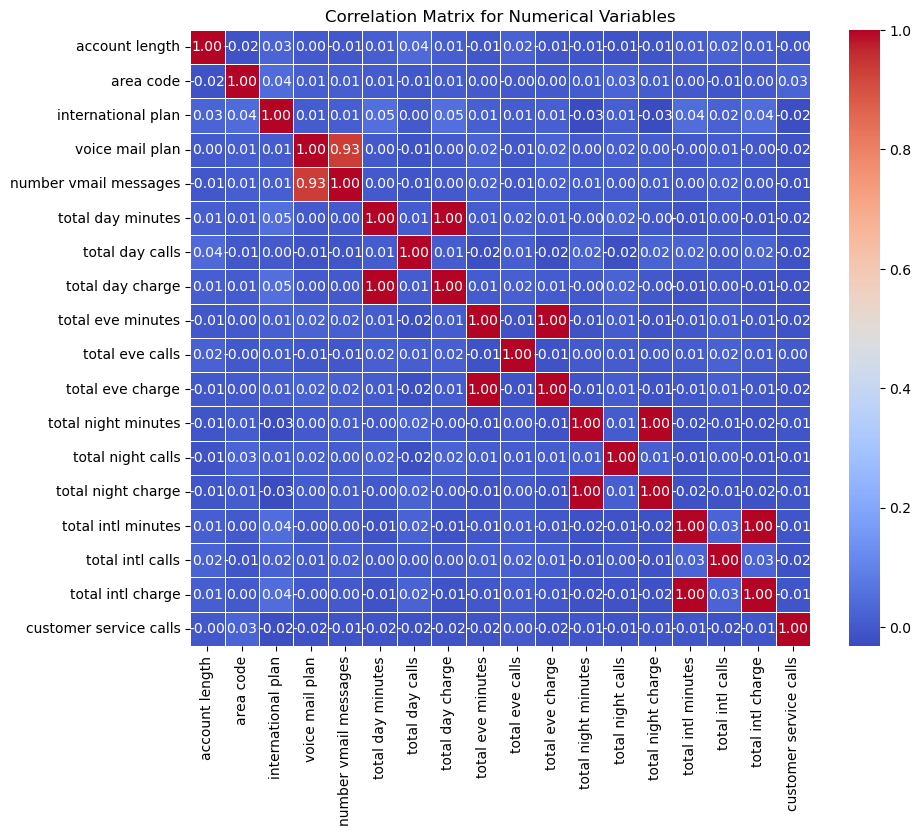

In [144]:
# Define Categorical and Numerical variables
categorical = ['state', 'international_plan', 'voice_mail_plan']
numerical = [x for x in data.columns if x not in categorical + ['churn']]

# Drop the target variable "churn" from the DataFrame
df_numerical = data[numerical]

# Calculate the correlation matrix for numerical variables
correlation_matrix = df_numerical.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

In [383]:
# Apply feature selection to remove highly correlated features
import numpy as np
corr_threshold = 0.8
upper_triangular = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangular.columns if any(upper_triangular[column] > corr_threshold)]
print("Numerical variables to drop are: ", to_drop)
print()
# Drop highly correlated features from the DataFrame
df_numerical_filtered = df_numerical.drop(to_drop, axis=1)

df_numerical_filtered.info()

Numerical variables to drop are:  ['number vmail messages', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   account length          3333 non-null   int64
 1   area code               3333 non-null   int64
 2   international plan      3333 non-null   int32
 3   voice mail plan         3333 non-null   int32
 4   total day minutes       3333 non-null   int64
 5   total day calls         3333 non-null   int64
 6   total eve minutes       3333 non-null   int64
 7   total eve calls         3333 non-null   int64
 8   total night minutes     3333 non-null   int64
 9   total night calls       3333 non-null   int64
 10  total intl minutes      3333 non-null   int64
 11  total intl calls        3333 non-null   int64
 12  customer service calls  3333 n

In [384]:
X = df_numerical_filtered
Y = data['churn'] 

# Random Forest

In [385]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [386]:
# Split the dataset into training, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [387]:
# Normalize the independent variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [388]:
# Create a Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=30, max_depth=3, min_samples_split=5, random_state=42)

In [389]:
# Fit the model to the training data
random_forest_classifier.fit(X_train_scaled, Y_train)

RandomForestClassifier(max_depth=3, min_samples_split=5, n_estimators=30,
                       random_state=42)

In [390]:
# Predictions
y_train_pred = random_forest_classifier.predict(X_train_scaled)
y_val_pred = random_forest_classifier.predict(X_val_scaled)
y_test_pred = random_forest_classifier.predict(X_test_scaled)

In [391]:
# Evaluate the model
print("\nTraining Classification Report:")
print(classification_report(Y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(Y_val, y_val_pred))

print("\nTesting Classification Report:")
print(classification_report(Y_test, y_test_pred))


Training Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1995
           1       1.00      0.04      0.07       338

    accuracy                           0.86      2333
   macro avg       0.93      0.52      0.50      2333
weighted avg       0.88      0.86      0.80      2333


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       429
           1       0.00      0.00      0.00        71

    accuracy                           0.86       500
   macro avg       0.43      0.50      0.46       500
weighted avg       0.74      0.86      0.79       500


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       426
           1       1.00      0.03      0.05        74

    accuracy                           0.86       500
   macro avg       0.93     

C:\Users\Home\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [392]:
# Additional metrics
print("\nAccuracy on Training Set:", accuracy_score(Y_train, y_train_pred).round(3)*100,'%')
print("Accuracy on Validation Set:", accuracy_score(Y_val, y_val_pred).round(4)*100,'%')
print("Accuracy on Test Set:", accuracy_score(Y_test, y_test_pred).round(4)*100,'%')


Accuracy on Training Set: 86.0 %
Accuracy on Validation Set: 85.8 %
Accuracy on Test Set: 85.6 %


In [393]:
# Confusion matrix
print("\nConfusion Matrix on Test Set:")
print(confusion_matrix(Y_test, y_test_pred))


Confusion Matrix on Test Set:
[[426   0]
 [ 72   2]]


In [394]:
# Assuming 'data' is your telecommunication DataFrame
# Specify the columns corresponding to your telecommunication features
telecom_columns = [
    'account length', 'area code', 'international plan', 'voice mail plan',
    'total day minutes', 'total day calls', 'total eve minutes', 'total eve calls',
    'total night minutes', 'total night calls', 'total intl minutes',
    'total intl calls', 'customer service calls'
]

# Extract the telecommunication features from the DataFrame
telecom_data = data[telecom_columns]

# Generate standardized input data for future predictions (X_future)
input_data_telecom = {
    'account length': 65, 'area code': 415, 'international plan': 0, 'voice mail plan': 0,
    'total day minutes': 129, 'total day calls': 137, 'total eve minutes': 228.5, 'total eve calls': 83,
    'total night minutes': 0, 'total night calls': 0, 'total intl minutes': 5,
    'total intl calls': 6, 'customer service calls': 5
}

# Convert the input data to a NumPy array and reshape it to match the expected format
X_future_telecom = scaler.transform(np.array([list(input_data_telecom.values())]))

# Make prediction for future values
prediction_telecom = random_forest_classifier.predict(X_future_telecom)

# Display the predictions
print("Predicted Class for Churn (0: No Churn, 1: Churn):")
print(prediction_telecom)

Predicted Class for Churn (0: No Churn, 1: Churn):
[0]


C:\Users\Home\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# XGBoost

In [401]:
from xgboost import XGBClassifier

In [402]:
xgb_classifier = XGBClassifier(n_estimators = 25, 
                         learning_rate = 0.2,
                         max_depth=3,
                         max_leaves=7,
                         verbosity = 1,            
                         random_state=42)
xgb_classifier.fit(X_train_scaled, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=7,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [403]:
# Predictions
y_train_pred = xgb_model.predict(X_train_scaled)
y_val_pred = xgb_model.predict(X_val_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

In [404]:
# Evaluate the model
print("\nTraining Classification Report:")
print(classification_report(Y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(Y_val, y_val_pred))

print("\nTesting Classification Report:")
print(classification_report(Y_test, y_test_pred))


Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1995
           1       0.96      0.77      0.85       338

    accuracy                           0.96      2333
   macro avg       0.96      0.88      0.92      2333
weighted avg       0.96      0.96      0.96      2333


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       429
           1       0.90      0.73      0.81        71

    accuracy                           0.95       500
   macro avg       0.93      0.86      0.89       500
weighted avg       0.95      0.95      0.95       500


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       426
           1       0.93      0.68      0.78        74

    accuracy                           0.94       500
   macro avg       0.94     

In [405]:
# Additional metrics
print("\nAccuracy on Training Set:", accuracy_score(Y_train, y_train_pred).round(3)*100,'%')
print("Accuracy on Validation Set:", accuracy_score(Y_val, y_val_pred)*100,'%')
print("Accuracy on Test Set:", accuracy_score(Y_test, y_test_pred).round(2)*100,'%')


Accuracy on Training Set: 96.2 %
Accuracy on Validation Set: 95.0 %
Accuracy on Test Set: 94.0 %


In [406]:
# Confusion matrix
print("\nConfusion Matrix on Test Set:")
print(confusion_matrix(Y_test, y_test_pred))


Confusion Matrix on Test Set:
[[422   4]
 [ 24  50]]


In [408]:
# Assuming 'data' is your telecommunication DataFrame
# Specify the columns corresponding to your telecommunication features
telecom_columns = [
    'account length', 'area code', 'international plan', 'voice mail plan',
    'total day minutes', 'total day calls', 'total eve minutes', 'total eve calls',
    'total night minutes', 'total night calls', 'total intl minutes',
    'total intl calls', 'customer service calls'
]

# Extract the telecommunication features from the DataFrame
telecom_data = data[telecom_columns]

# Generate standardized input data for future predictions (X_future)
input_data_telecom = {
    'account length': 65, 'area code': 415, 'international plan': 0, 'voice mail plan': 0,
    'total day minutes': 129, 'total day calls': 137, 'total eve minutes': 228.5, 'total eve calls': 83,
    'total night minutes': 0, 'total night calls': 0, 'total intl minutes': 5,
    'total intl calls': 6, 'customer service calls': 5
}

# Convert the input data to a NumPy array and reshape it to match the expected format
X_future_telecom = scaler.transform(np.array([list(input_data_telecom.values())]))

# Make prediction for future values
prediction_telecom = xgb_classifier.predict(X_future_telecom)

# Display the predictions
print("Predicted Class for Churn (0: No Churn, 1: Churn):")
print(prediction_telecom)

Predicted Class for Churn (0: No Churn, 1: Churn):
[1]


C:\Users\Home\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
